In [8]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
import scipy as sp
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

#### 1. 데이터 불러오기

In [2]:
test = pd.read_csv('../../data/chick003.csv') 
test

,hatchery,chick_nm,weight
0,A,a01,112
1,A,a05,116
2,A,a09,106
3,A,a12,104
4,A,a15,116
5,A,a17,118
6,A,a26,110
7,A,a28,112
8,A,a29,106
9,A,a30,108


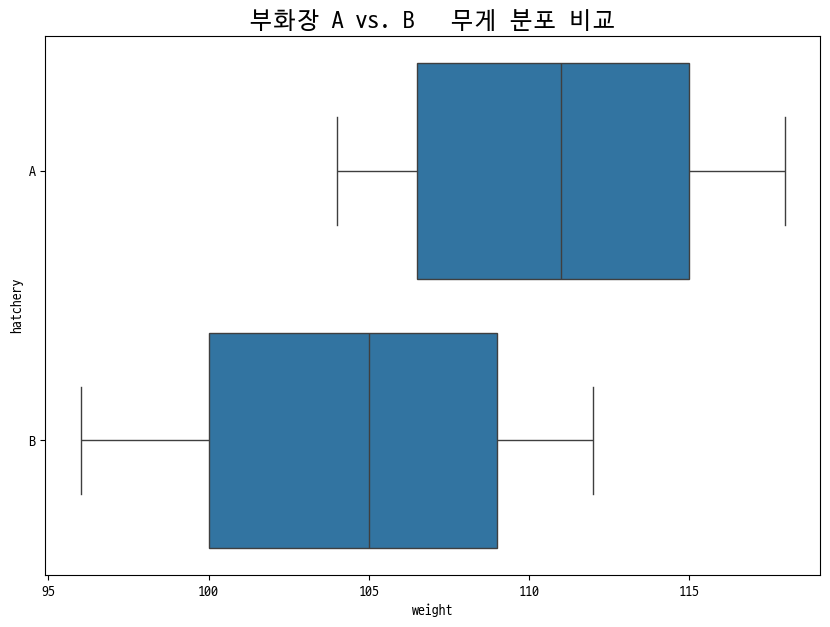

In [5]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = 'weight', y = 'hatchery', data= test)
plt.title('부화장 A vs. B   무게 분포 비교', fontsize = 17)
plt.show()

#### 2. t-test (귀무가설 : 두 집단의 평균은 같다)

In [6]:
# 부화장 A만 별도로 데이터셋 구성
test_a = test.loc[test.hatchery == 'A', 'weight']
test_a

0    112
1    116
2    106
3    104
4    116
5    118
6    110
7    112
8    106
9    108
Name: weight, dtype: int64

In [7]:
# 부화장 B만 별도로 데이터셋 구성
test_b = test.loc[test.hatchery == 'B', 'weight']
test_b

10    100
11    110
12     98
13    100
14    104
15    112
16    106
17    106
18     96
19    110
Name: weight, dtype: int64

In [ ]:
# 부화장 A 샤피로-윌크 검정 실시 (귀무가설 : 정규분포를 이룬다)
sp.stats.shapiro(test_a)

ShapiroResult(statistic=np.float64(0.9400016973451231), pvalue=np.float64(0.5530322552073004))

In [10]:
# 부화장 B 샤피로-윌크 검정 실시 (귀무가설 : 정규분포를 이룬다)
sp.stats.shapiro(test_b)

ShapiroResult(statistic=np.float64(0.9390683777600799), pvalue=np.float64(0.5426943326835627))

In [11]:
## t-test (귀무가설 : 두 집단의 평균은 같다)
sp.stats.ttest_ind(test_a, test_b)

TtestResult(statistic=np.float64(2.842528280230058), pvalue=np.float64(0.010803990633924204), df=np.float64(18.0))